# **Дз 1**

## 1.1. Описание задачи, загрузка и предобработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rawData = pd.read_csv("kickstarter_projects.csv", index_col=0)
rawData.sort_index(inplace=True)
rawData

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
ID,,,,,,,,,,
5971,An American Apocalypse: The Reckoning,Comics,Comics,United States,2012-06-08 18:46:56,2012-08-06,48000,376,7,Failed
18520,Grandma's are Life,Music,World Music,United States,2016-10-19 15:32:40,2016-11-18,15000,62,4,Failed
21109,Meta,Art,Performance Art,United Kingdom,2015-04-08 00:37:44,2015-05-06,231,267,11,Successful
21371,Water Powered Car,Technology,Technology,United States,2016-07-26 19:02:01,2016-08-10,75000,120,4,Failed
24380,Puss N' Books: A relaxing cat cafe and bookstore.,Food,Spaces,United States,2015-10-27 16:25:33,2015-11-26,20000,776,18,Failed
...,...,...,...,...,...,...,...,...,...,...
2147455254,Affordable 3D Laser Scanner for Drones and Gro...,Technology,Technology,Canada,2015-08-18 16:49:43,2015-09-12,23029,172,9,Failed
2147460119,Moments of Insight,Art,Conceptual Art,United States,2011-06-24 21:29:15,2011-08-04,18000,18758,53,Successful
2147466649,Dream Wedding Photo's,Photography,Fine Art,Canada,2014-07-11 20:56:05,2014-07-24,1393,0,0,Failed


В данном датасете содержится информация о 372061 проектах c Kickstarter, собранная с 2009 по 2018 год. Kickstarter это популярная платформа для краудфандинга, позволяющая людям размещать разнообразные проекты, будь то видеоигры, фильмы, научные исследования, и осуществлять сбор средств на их реализацию.  
В соответствии с правилами платформы при добавлении проекта необходимо указывать срок, на протяжении которого будт осуществляться сбор средств, и минимальное количество средств('Goal'), которое планируется собрать, если проект не достигает цели к указанному сроку, то деньги возвращаются спонсорам. При этом люди могут в реальном времени видеть количество уже пожертвованных денег('Pledged') и число спонсоров('Backers'), которые их пожертвовали. 

Всего в датасете содержится 11 признаков:
- `ID` - идентификатор проекта (используется в качестве индекса).
- `Name` - название проекта.
- `Category` - категория проекта.
- `Subcategory` - подкатегория проекта.
- `Country` - страна происхождения проекта.
- `Launched` - дата, в которую начался сбор средств.
- `Deadline` - дата, в которую прекратиться сбор средств.
- `Goal` - минимальное количество средств, которое проект должен собрать к дедлайну.
- `Pledged` - количество средств, которое было собрано к дедлайну.
- `Backers` - количество спонсоров, которые пожертвовали средства пока шел сбор средств.
- `State` - статус проекта
    - Successful - проекты достигшие цели к дедлайну.
    - Failed - проекты не достигшие цели к дедлайну, но достигшие дедлайна.
    - Canceled - проекты отмененные авторами.
    - Live - проекты, еще не достигшие дедлайна на момент оканчания сбора данных.
    - Suspended - проекты, замороженные администрацией платформы за подозрительную активность.

Для данного датасета будем решать задачу классификации: определяем сможет ли проект достигнуть цели за отведенное время, в таком случае очевидно из выборки нужно убрать столбцы `Pledged` и `Backers`, их нельзя использовать в качестве признаков, т.к. при создании проекта у нас нет информации из будущего.  

Очевидно, что для решения задачи классификации классы "Live" и "Suspended" точно не представляют интереса, а класс "Canceled" представляет сомнительный интерес, поэтому отбросим эти классы, так же отбросим признаки `Pledged` и `Backers`:

In [2]:
rawData['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [3]:
rawSelData = rawData.drop(index=rawData[(rawData['State'] == "Live") | (rawData['State'] == "Suspended") | (rawData['State'] == "Canceled")].index, columns=['Pledged', 'Backers'])

Напрямую использовать в качестве признаков дату мы в общем случае не сможем, поэтому переведем `Launched` и `Deadline` в числовые признаки:
- `StartYear` - год запуска проекта.
- `StartMonth` - месяц запуска проекта.
- `StartDay` - день месяца запуска проекта.
- `Days` - число дней на выполнение цели.

In [4]:
rawSelData['Launched'] = rawSelData['Launched'].astype('datetime64[ns]')
rawSelData['Deadline'] = rawSelData['Deadline'].astype('datetime64[ns]')

rawSelData['StartYear'] = rawSelData['Launched'].dt.year
rawSelData['StartMonth'] = rawSelData['Launched'].dt.month
rawSelData['StartDay'] = rawSelData['Launched'].dt.day
rawSelData['Days'] = (rawSelData['Deadline'] - rawSelData['Launched']) / pd.Timedelta(days=1)

rawSelData.drop(columns=['Name', 'Launched', 'Deadline'], inplace=True)
rawSelData

,Category,Subcategory,Country,Goal,State,StartYear,StartMonth,StartDay,Days
ID,,,,,,,,,
5971,Comics,Comics,United States,48000,Failed,2012,6,8,58.217407
18520,Music,World Music,United States,15000,Failed,2016,10,19,29.352315
21109,Art,Performance Art,United Kingdom,231,Successful,2015,4,8,27.973796
21371,Technology,Technology,United States,75000,Failed,2016,7,26,14.206933
24380,Food,Spaces,United States,20000,Failed,2015,10,27,29.315590
...,...,...,...,...,...,...,...,...,...
2147455254,Technology,Technology,Canada,23029,Failed,2015,8,18,24.298808
2147460119,Art,Conceptual Art,United States,18000,Successful,2011,6,24,40.104687
2147466649,Photography,Fine Art,Canada,1393,Failed,2014,7,11,12.127720


In [5]:
rawSelData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331462 entries, 5971 to 2147476221
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Category     331462 non-null  object 
 1   Subcategory  331462 non-null  object 
 2   Country      331462 non-null  object 
 3   Goal         331462 non-null  int64  
 4   State        331462 non-null  object 
 5   StartYear    331462 non-null  int32  
 6   StartMonth   331462 non-null  int32  
 7   StartDay     331462 non-null  int32  
 8   Days         331462 non-null  float64
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 21.5+ MB


Пропущенных значений нет.

In [6]:
rawSelData.describe()

,Goal,StartYear,StartMonth,StartDay,Days
count,3.314620e+05,331462.000000,331462.000000,331462.000000,331462.000000
mean,4.152286e+04,2014.178995,6.417876,15.284917,33.390412
std,1.109279e+06,1.931006,3.307267,8.814059,12.724109
min,0.000000e+00,2009.000000,1.000000,1.000000,0.005058
25%,2.000000e+03,2013.000000,4.000000,8.000000,29.088915
50%,5.000000e+03,2014.000000,6.000000,15.000000,29.656991
75%,1.500000e+04,2016.000000,9.000000,23.000000,35.709225
max,1.663614e+08,2017.000000,12.000000,31.000000,91.962650


In [7]:
rawSelData['Category'] = rawSelData['Category'].astype('category')
rawSelData['Subcategory'] =rawSelData['Subcategory'].astype('category')
rawSelData['Country'] = rawSelData['Country'].astype('category')
rawSelData['State'] = rawSelData['State'].astype('category')

rawSelData.describe(include=['category'])

,Category,Subcategory,Country,State
count,331462,331462,331462,331462
unique,15,159,22,2
top,Film & Video,Product Design,United States,Failed
freq,56503,18679,261358,197611


<Axes: xlabel='count', ylabel='Category'>

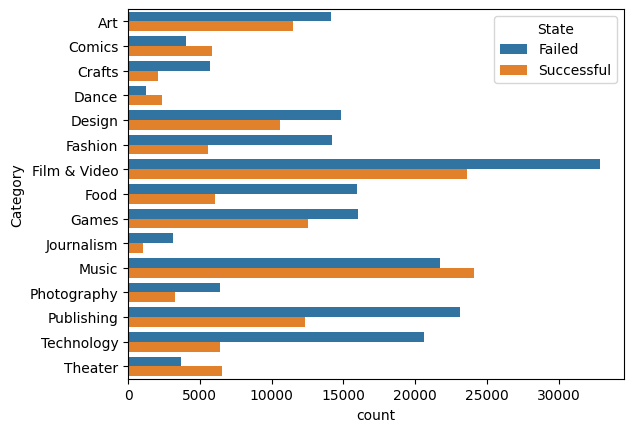

In [8]:
sns.countplot(y='Category', hue='State', data=rawSelData)

[None, None]

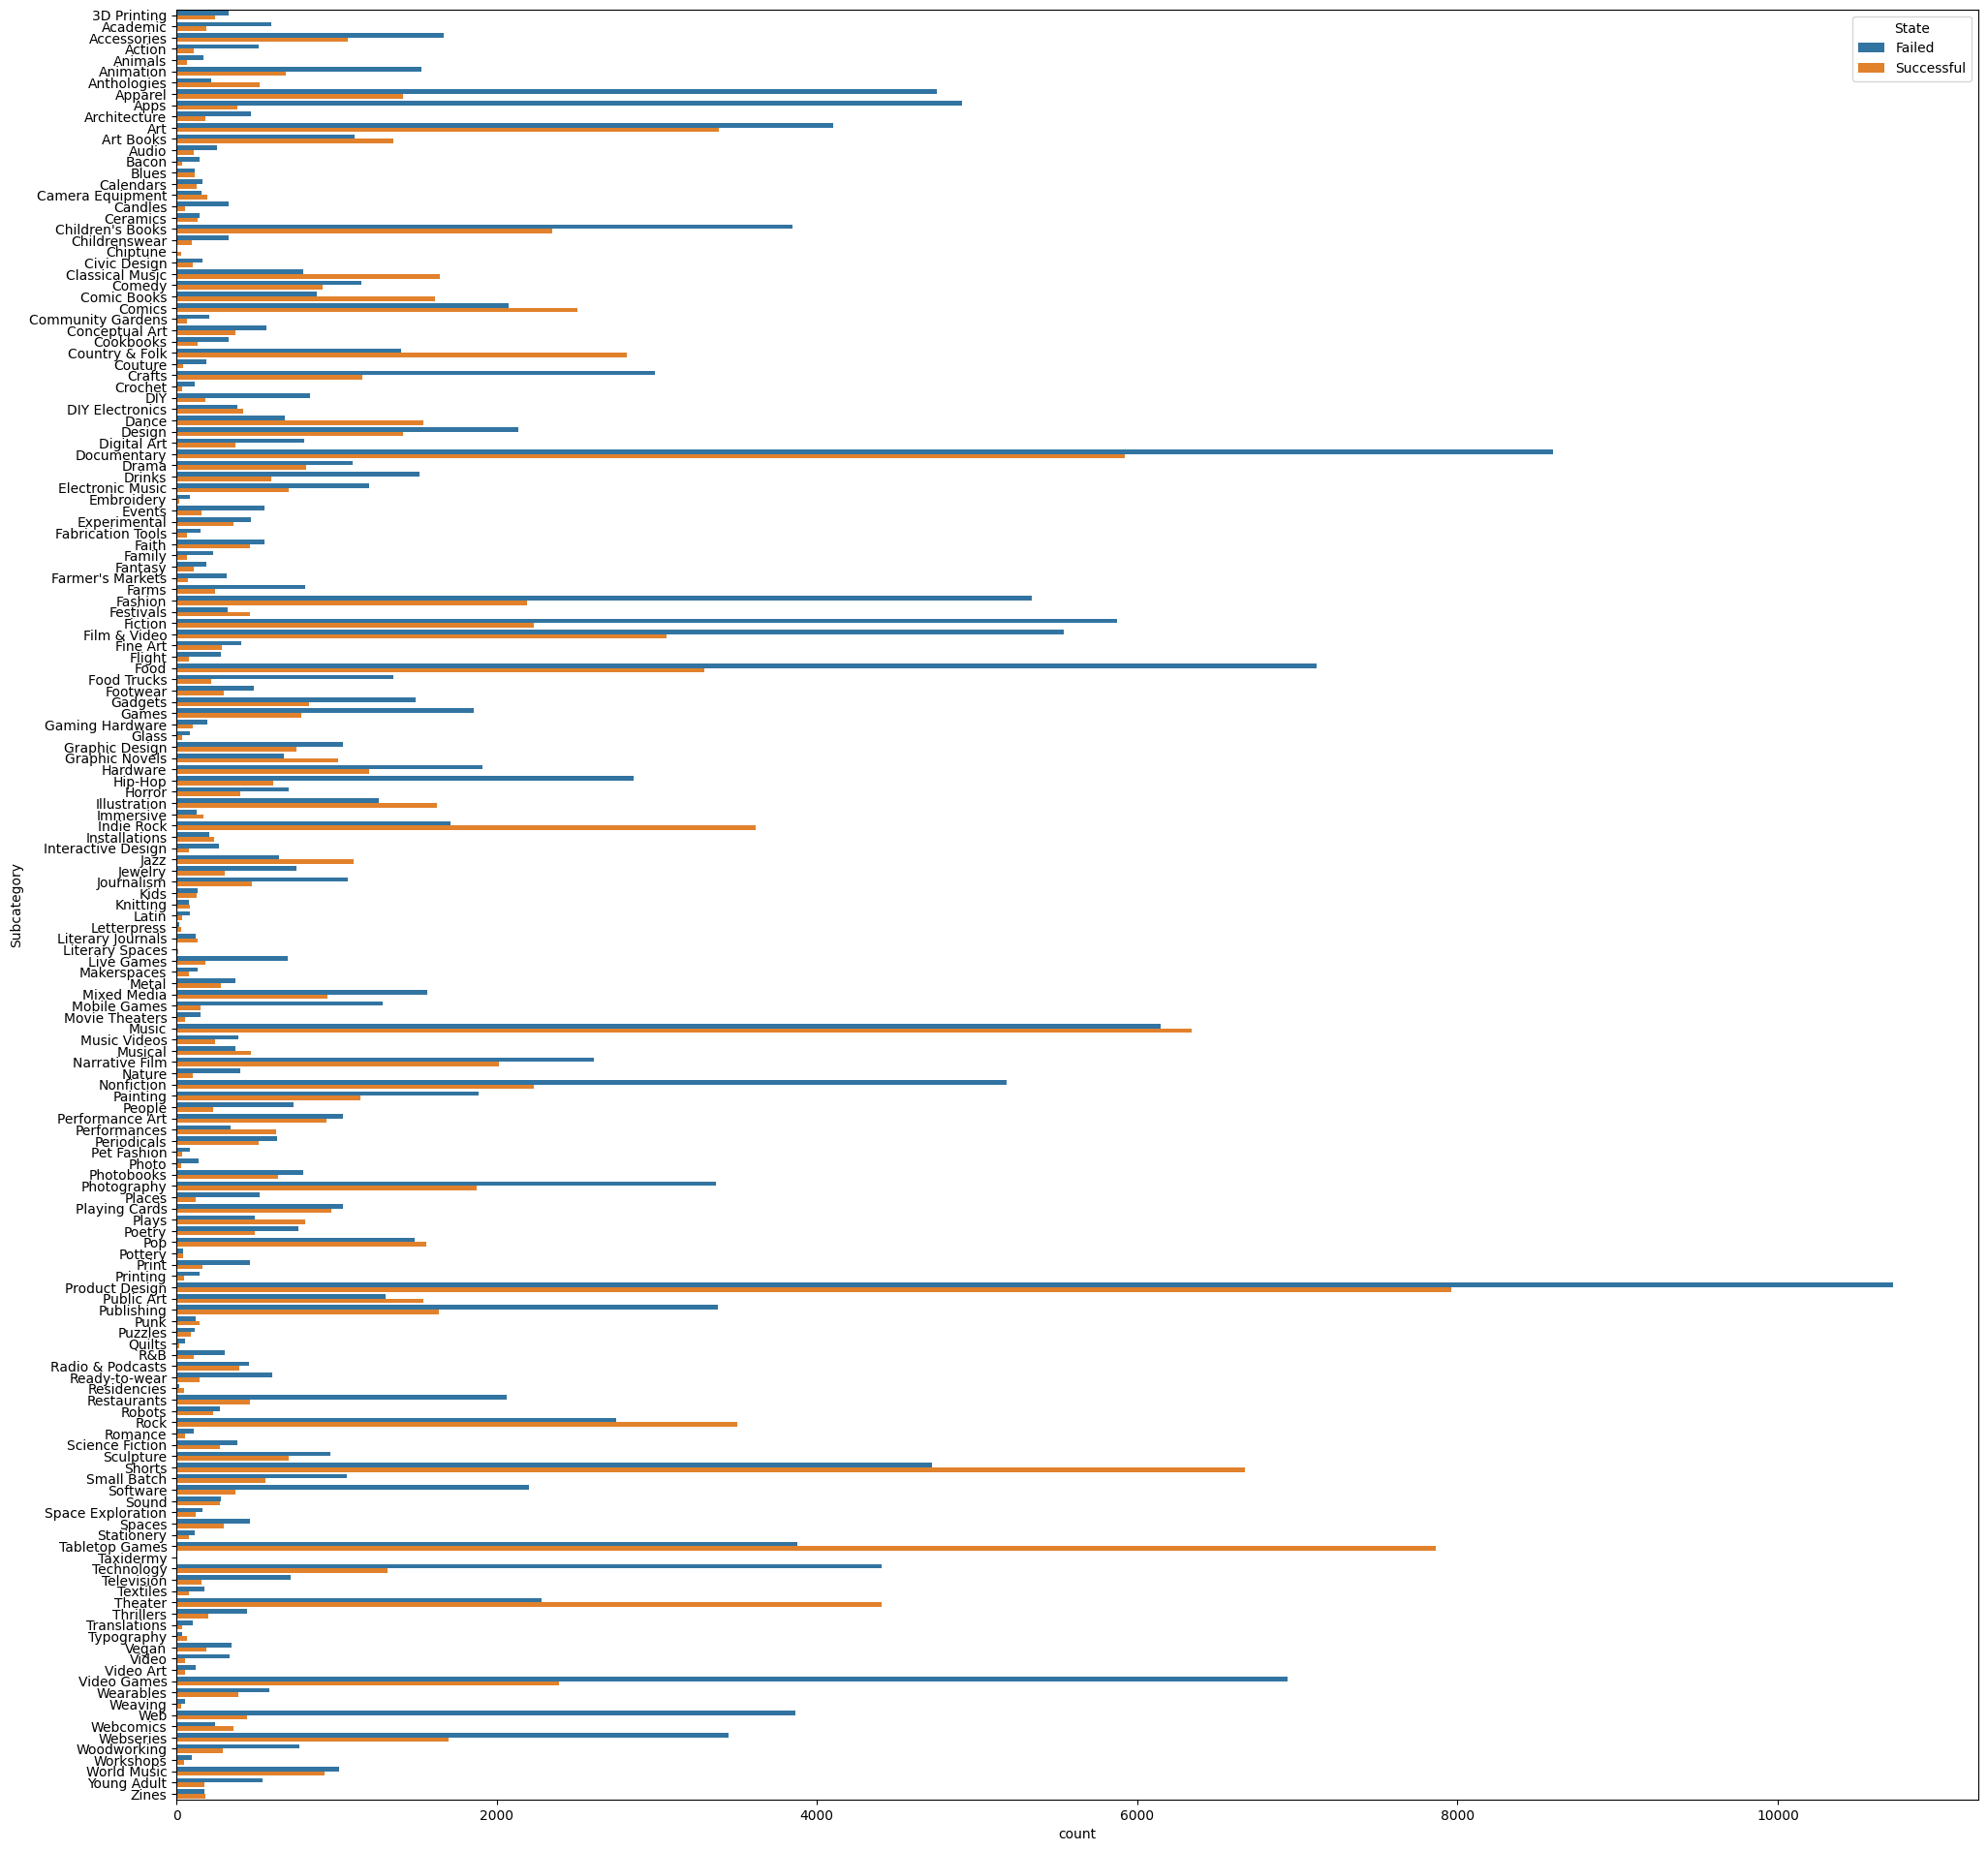

In [9]:
sns.countplot(y='Subcategory', hue='State', data=rawSelData).figure.set(figheight=24, figwidth=24)

<Axes: xlabel='count', ylabel='Country'>

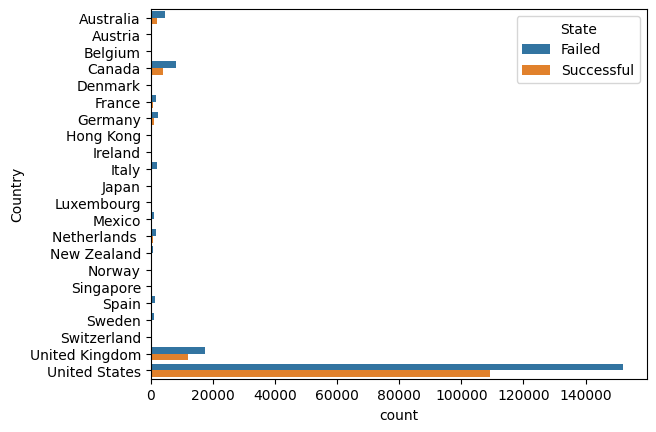

In [10]:
sns.countplot(y='Country', hue='State', data=rawSelData)

По графикам можно заметить, что в зависимости от выбора категории и подкатегории распределение по классам заметно отличается. В случае же с последним графиком вся выборка по большей части представлена буквально парой стран и распределение по классам в них слабо отличается, очевидно этот признак несет существенно меньше ценности, чем предыдущие.  
Распределение остальных признаков по классам можно будет рассмотреть на гистограммах в матрице диаграмм рассеивания, после очистки от выбросов.

## 1.2. Борьба с выбросами и визуализация данных

<Axes: >

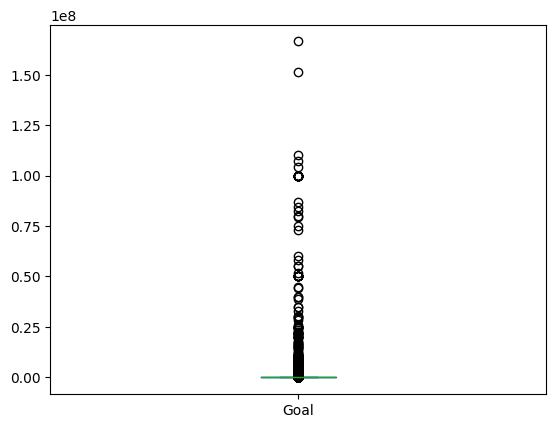

In [11]:
rawSelData['Goal'].plot(kind='box')

Выбросы очевидно присутсвуют, отбросим их, сохранив 99% выборки.

In [12]:
rawSelData['Goal'].quantile([0.001,.005,.01,.04,.045,.05,.1,.5,.9,.91,.925,.95,.99,.995,.999])

0.001          1.0
0.005         25.0
0.010         79.0
0.040        300.0
0.045        350.0
0.050        400.0
0.100        673.0
0.500       5000.0
0.900      40000.0
0.910      46500.0
0.925      50000.0
0.950      75000.0
0.990     300000.0
0.995     529000.0
0.999    3000000.0
Name: Goal, dtype: float64

<Axes: >

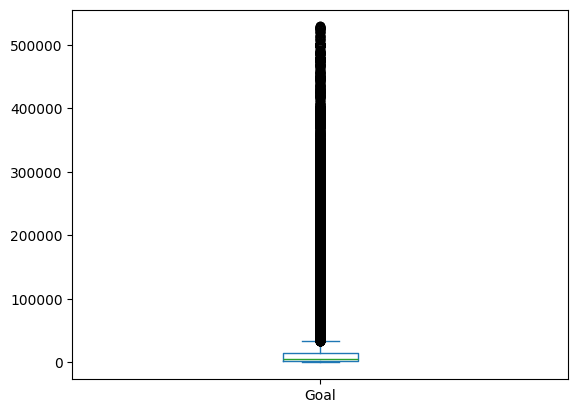

In [13]:
data1 = rawSelData.drop(rawSelData[(rawSelData['Goal'] < rawSelData['Goal'].quantile(.005)) | (rawSelData['Goal'] > rawSelData['Goal'].quantile(.995))].index)
data1['Goal'].plot(kind='box')

<Axes: >

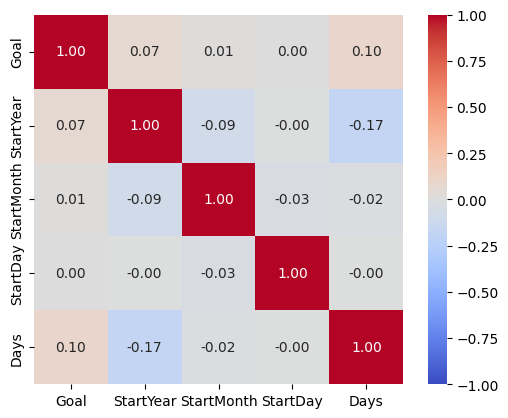

In [14]:
corrMatr = data1.corr(numeric_only=True)
sns.heatmap(corrMatr, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Наблюдаются только слабо коррелирующие признаки, это упрощает подбор метода обучения.

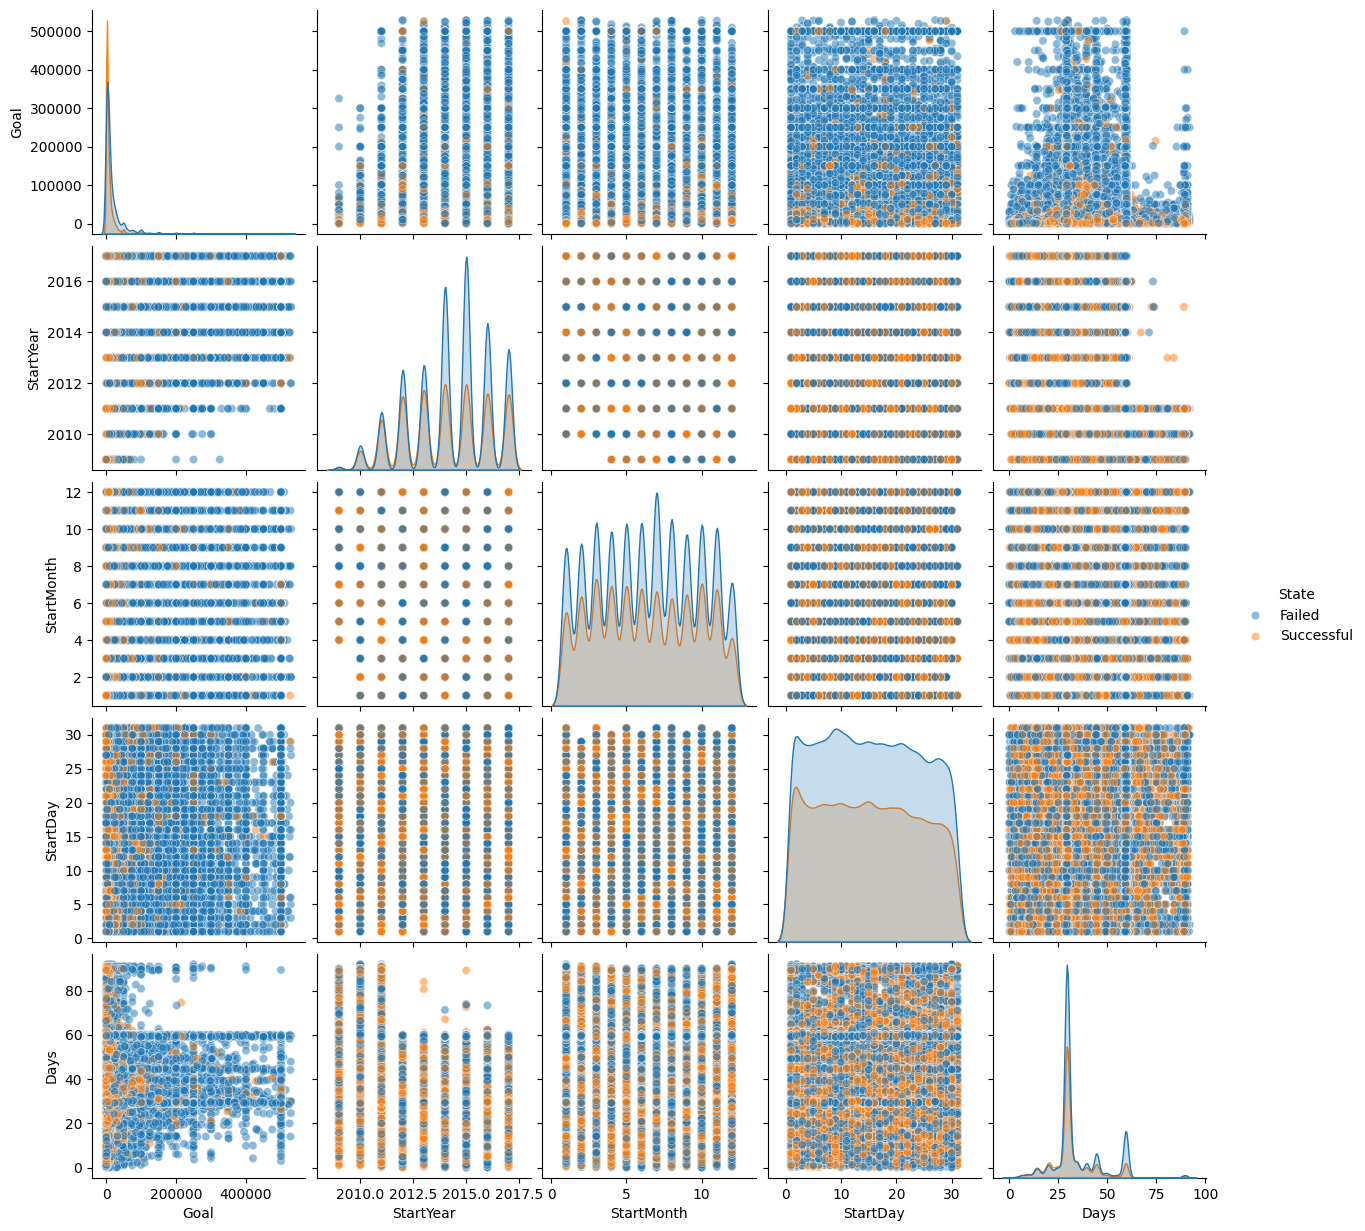

In [15]:
sns.pairplot(data=data1, hue='State', plot_kws={'alpha': 0.5})

По двухмерным диаграммам рассеивания сложно уловить какие-либо явные закономерности кроме очевидной, что большей заявленной цели соответствует большее число провальных проектов, возможно трехмерные были бы нагляднее.  
По графикам распределений для дня и месяца запуска проекта заметно, что распределения по классам довольно слабо отличаются друг от друга, из чего можно предположить, что итоговое влияние этих двух признаков на успешность проекта может быть довольно низкое, это плохо, т.к. шумовые признаки негативно влияют на работу некоторых методов.

## 1.3. Машинное обучение

Учитывая отсутствие коррелирующих признаков, наличие потенциальных выбросов, наличие большого кол-ва потенциально шумовых признаков и достаточно большую выборку, в качестве классификатора хороший результат должен показать Градиентный бустинг, но перед ним можно для сравнения рассмотреть метод k-ближайших соседей, неустойчивый к незначимым признакам.  
Проведем разбиение выборки на обучающую и тестовую, кодирование категориальных и временных признаков, а также масштабирование признаков для метода k-ближайших соседей:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# кодирование дня и месяца с помощью тригономитрических функций (таким образом сохраняется связь между началом дня/месяца и концом)
data1['StartMonth_sin'] = np.sin(2.*np.pi*(data1['StartMonth']-1)/12)
data1['StartMonth_cos'] = np.cos(2.*np.pi*(data1['StartMonth']-1)/12)
data1['StartDay_sin'] = np.sin(2.*np.pi*(data1['StartDay']-1)/31)
data1['StartDay_cos'] = np.cos(2.*np.pi*(data1['StartDay']-1)/31)

X = data1.drop(['State', 'StartMonth', 'StartDay'], axis=1)
y = data1['State']

# кодирование категорий отдельными признаками
enc = OneHotEncoder(drop='first', sparse_output=False)
enc.fit(X[['Category', 'Subcategory', 'Country']])

dummies = pd.DataFrame(enc.transform(X[['Category', 'Subcategory', 'Country']]),
                       columns=enc.get_feature_names_out(), index=X.index)
X = pd.concat((X, dummies), axis=1).drop(['Category', 'Subcategory', 'Country'], axis=1)

# разбиение выборки на обучающую и тестовую в соотношении 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 47)

# масштабирование данных путем стандартизации
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train
#X_train.describe()

,Goal,StartYear,Days,StartMonth_sin,StartMonth_cos,StartDay_sin,StartDay_cos,Category_Comics,Category_Crafts,Category_Dance,...,Country_Mexico,Country_Netherlands,Country_New Zealand,Country_Norway,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States
ID,,,,,,,,,,,,,,,,,,,,,
1539707440,1.468600,1.461968,2.023878,-0.025108,1.509132,-1.457989,-0.050423,-0.175596,-0.155299,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,-1.937148
2103803423,-0.411276,0.945144,-0.430666,-0.025108,1.509132,-1.315089,-0.601525,-0.175596,6.439177,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,0.516223
1414084666,1.308636,0.428321,-0.344352,-1.235146,-0.645044,1.356042,0.235315,-0.175596,-0.155299,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,0.516223
371173492,-0.398902,-1.638973,-0.991809,0.673508,1.316729,1.356042,0.235315,-0.175596,-0.155299,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,0.516223
1620754470,-0.422758,-0.088503,-0.296018,-1.235146,-0.645044,1.327167,-0.333229,-0.175596,-0.155299,9.527933,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,-1.937148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239279255,-0.285685,-1.122150,0.103682,0.673508,1.316729,0.514726,1.320608,-0.175596,-0.155299,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,0.516223
771562631,-0.361782,-1.122150,-0.335698,1.184930,0.791074,-0.852684,1.181761,-0.175596,-0.155299,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,0.516223
1879736245,-0.329091,0.945144,-0.336337,1.184930,-0.645044,0.765250,1.181761,-0.175596,-0.155299,-0.104955,...,-0.066105,-0.085152,-0.062013,-0.041881,-0.037354,-0.074674,-0.066722,-0.044979,-0.312514,-1.937148


train error: 0.26775485663679427
test error: 0.36242428674149635


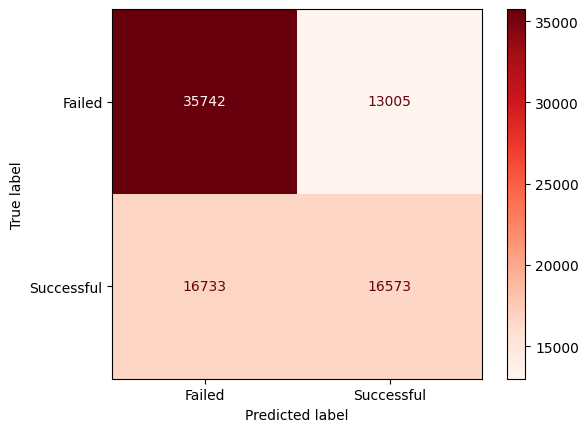

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kNClf = KNeighborsClassifier(n_neighbors=7, p=2)
kNClf.fit(X_train, y_train)

y_train_pred = kNClf.predict(X_train)
y_test_pred = kNClf.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=kNClf.classes_).plot(cmap = 'Reds')

Результаты не очень воодушевляющие, в целом классификатор ошибается более чем в трети случаев и в половине случаев ошибочно определяет успешные проекты как провальные, но с точки зрения практического применения (оценки рисков при запуске проекта) это лучше, чем если бы он в таком же соотношении определял провальные как успешные.  
Наблюдается серьезное переобучение (которое сохраняется при любом выборе гиперпараметров).

train error: 0.3054460955971368
test error: 0.30915383959148357


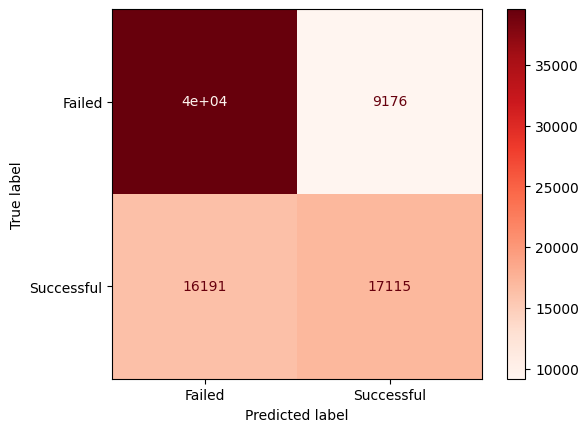

In [18]:
from sklearn import ensemble

grBClf = ensemble.GradientBoostingClassifier(n_estimators = 500)
grBClf.fit(X_train, y_train)

y_train_pred = grBClf.predict(X_train)
y_test_pred = grBClf.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=grBClf.classes_).plot(cmap = 'Reds')

Как и ожидалось Градиентный бустинг превосходит метод k-ближайших соседей, в большинстве случаев ему удается правильно предсказать класс, что для усапешных проектов, что для провальных, при этом провальные проекты как успешные он определяет всего лишь в пятой части случаев, что позволяет с достаточно хорошей точностью оценить риски при запуске проекта. Переобучения не наблюдается.  
Так же извлечем из модели определенные ею значимости признаков:

In [19]:
importances = pd.Series(grBClf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.head(15)

Goal                          0.296472
Days                          0.196137
StartYear                     0.086979
Subcategory_Tabletop Games    0.058952
Category_Music                0.037117
Category_Theater              0.028057
Subcategory_Hip-Hop           0.020045
Category_Comics               0.019290
Subcategory_Apps              0.019229
Category_Fashion              0.014807
Subcategory_Web               0.014724
Subcategory_Shorts            0.013759
Category_Dance                0.012171
Category_Crafts               0.011658
Subcategory_Product Design    0.010542
dtype: float64

Наиболее значимыми признаками для данной модели оказались указанная цель сбора и время, отведенное для её достижения, также существенное влияние оказали год запуска проекта и некоторые категории и подкатегории.

# **Дз 2**

## 2.1. Случайный лес

train error: 0.0
test error: 0.32001267473462275


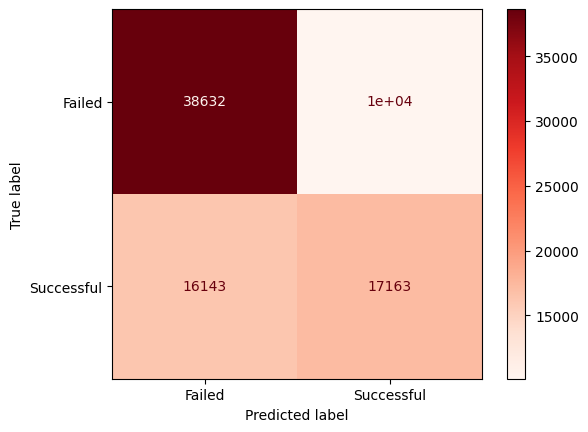

In [20]:
rdF = ensemble.RandomForestClassifier(n_estimators = 500, n_jobs=-1)
rdF.fit(X_train, y_train)

y_train_pred = rdF.predict(X_train)
y_test_pred = rdF.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=rdF.classes_).plot(cmap = 'Reds')

## 2.2. Логистическая регрессия

train error: 0.331327846342593
test error: 0.3322121068090137


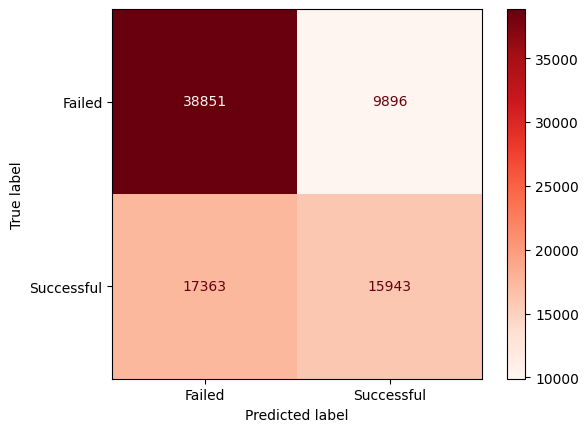

In [21]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=200)
logReg.fit(X_train, y_train)

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=logReg.classes_).plot(cmap = 'Reds')

## 2.3. Полносвязная нейронная сеть (1 скрытый слой)

In [22]:
X_train.shape

(246158, 200)

train error: 0.3051901624160092
test error: 0.3215970165624657


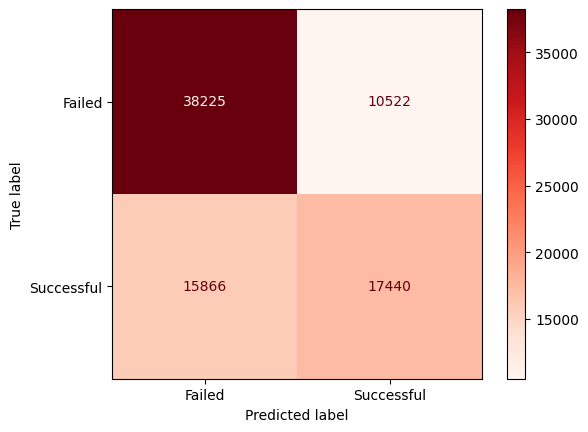

In [23]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=500, random_state=47)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=mlp.classes_).plot(cmap = 'Reds')

## 2.4. Подбор гиперпараметров

In [24]:
from tqdm import tqdm

alpha = np.array([0.0001, 0.001, 0.01])
sizes = np.array([(10), (20), (50)])

resultData = pd.DataFrame(columns=('alpha', 'size', 'train error', 'test error'))
for a in tqdm(alpha):
    for s in sizes:
        mlp = MLPClassifier(max_iter=500, alpha=a, hidden_layer_sizes=s, random_state=47)
        mlp.fit(X_train, y_train)

        y_train_pred = mlp.predict(X_train)
        y_test_pred = mlp.predict(X_test)
        
        trainErr = (y_train_pred != y_train).mean()
        testErr = (y_test_pred != y_test).mean()
        
        resultData.loc[len(resultData)] = (a, s, trainErr, testErr)

resultData

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [18:11<00:00, 363.74s/it]


,alpha,size,train error,test error
0,0.0001,10.0,0.317166,0.322170
1,0.0001,20.0,0.314509,0.320829
2,0.0001,50.0,0.305190,0.321597
3,0.0010,10.0,0.316971,0.322474
4,0.0010,20.0,0.314420,0.323254
5,0.0010,50.0,0.307420,0.322804
6,0.0100,10.0,0.317101,0.322487
7,0.0100,20.0,0.313522,0.322036
8,0.0100,50.0,0.312251,0.321670


In [25]:
bestResult = resultData.loc[resultData['test error'].idxmin()]
bestResult

alpha           0.000100
size           20.000000
train error     0.314509
test error      0.320829
Name: 1, dtype: float64

train error: 0.31450938015420987
test error: 0.32082922013820336


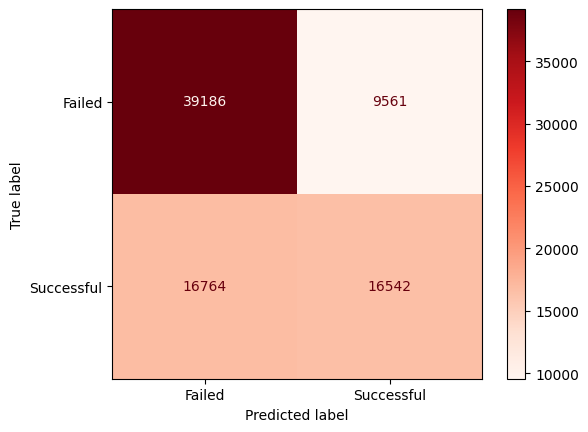

In [26]:
mlp = MLPClassifier(max_iter=500, alpha=0.0001, hidden_layer_sizes=20, random_state=47)

mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=mlp.classes_).plot(cmap = 'Reds')

## 2.5. Сравнение гиперпараметров

<Axes: xlabel='alpha', ylabel='test error'>

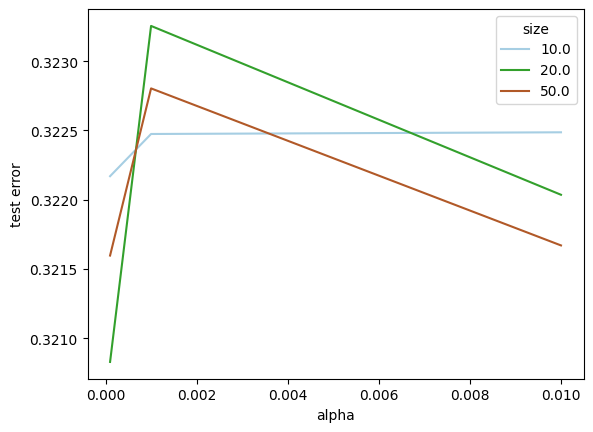

In [27]:
sns.lineplot(data=resultData, x='alpha', y='test error', hue='size', palette=plt.cm.Paired)

<Axes: xlabel='size', ylabel='test error'>

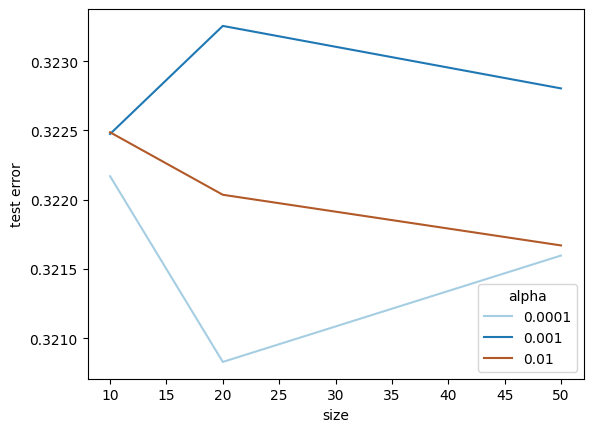

In [28]:
sns.lineplot(data=resultData, x='size', y='test error', hue='alpha', palette=plt.cm.Paired)